# Projeto: Rede Steam

Professores: Marcelo Hashimoto, Charles Kirschbaum


Alunos: André Rocco, André Tavernaro, Arthur Carvalho

In [1]:
import csv
import netpixi
from netpixi.data.gt import *
import pandas as pd
from graph_tool import Graph, util, stats, centrality
g = Graph(directed=False)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.formula.api as smf

## Importando Database

In [2]:
games = []
genres = []
owners = []
categories = []
release_date = []

with open('../notebooks/steam.csv') as file:
    reader = csv.reader(file, delimiter=',', quotechar='"')
    i = 0;
    for row in reader:
        game = row[1]
        category = row[8]
        genre = row[9]
        owner = row[16]
        release = row[2]
        games.append(game)
        categories.append(category)
        genres.append(genre)
        owners.append(owner)
        release_date.append(release)
        i += 1
        
#print(owners)

## Processamento de dados

In [3]:
splitsgen = []
uniquegen = []
for o in range(len(genres)):
    unique = genres[o].split(";")
    splitsgen.append(unique)

for u in range(len(splitsgen)):
    for v in range(len(splitsgen[u])):
        if splitsgen[u][v] not in uniquegen:
            uniquegen.append(splitsgen[u][v])

# splitscat = []
# uniquecat = []
# for o in range(len(categories)):
#     uniquec = categories[o].split(";")
#     splitscat.append(uniquec)

# for u in range(len(splitscat)):
#     for v in range(len(splitscat[u])):
#         if splitscat[u][v] not in uniquecat:
#             #print(splits[u][v])
#             uniquecat.append(splitscat[u][v])

if 'owners' in owners:
    owners.remove('owners')
    
if 'categories' in categories:
    categories.remove('categories')
    
if 'release_date' in release_date:
    release_date.remove('release_date')

owner_split = []

for v in range(len(owners)):
    sep = owners[v].split("-")
    owner_split.append(sep)
    
cat_split = []
for p in range(len(categories)):
    sepcat = categories[p].split(";")
    cat_split.append(sepcat)

release_split = []
for r in range(len(release_date)):
    seprelease = release_date[r].split("-")
    release_split.append(seprelease)
    
owners_avg = []
for t in range(len(owner_split)):
    avg = (int(owner_split[t][0]) + int(owner_split[t][1])) / 2
    owners_avg.append(avg)
    
release_year = []
for n in range(len(release_split)):
    release_year.append(release_split[n][0])
    


    
df_owners = pd.DataFrame(owners_avg)
df_owners[0] = df_owners[0].astype(int)
#df_owners

soma_owners = df_owners[0].sum()
print(soma_owners/len(df_owners))

#len()

134090.4893813481


## Filtragem por número de Owners

In [4]:
indexesToRemove = []
for gt in range(0,len(owners)):
    if owners[gt] == '0-20000' or owners[gt] == '20000-50000' or owners[gt] == '50000-100000' or owners[gt] =='100000-200000': #or owners[gt] == '200000-500000':
        indexesToRemove.append(gt)
print(len(indexesToRemove))

24736


In [5]:
games = [i for j, i in enumerate(games) if j not in indexesToRemove]
print(len(games))

2340


## Criando Vértices

In [6]:
for all in range(len(games)):
    g.add_vertex()

print('número de vértices de g:', g.num_vertices())

número de vértices de g: 2340


## Criando Arestas

In [7]:
Action               = []
FreeToPlay           = []
Strategy             = []
Adventure            = []
Indie                = []
RPG                  = []
AnimationModeling    = []
VideoProduction      = []
Casual               = []
Simulation           = []
Racing               = []
Violent              = []
MassivelyMultiplayer = []
Nudity               = []
Sports               = []
EarlyAccess          = []
Gore                 = []
Utilities            = []
DesignIllustration   = []
WebPublishing        = []
Education            = []
SoftwareTraining     = []
SexualContent        = []
AudioProduction      = []
GameDevelopment      = []
PhotoEditing         = []
Accounting           = []
Documentary          = []
Tutorial             = []

for i in range(len(games)):
    if 'Action' in genres[i]:
        Action.append(games[i])
    if 'Free to Play' in genres[i]:
        FreeToPlay.append(games[i])
    if 'Strategy' in genres[i]:
        Strategy.append(games[i])
    if 'Adventure' in genres[i]:
        Adventure.append(games[i])
    if 'Indie' in genres[i]:
        Indie.append(games[i])
    if 'RPG' in genres[i]:
        RPG.append(games[i])
    if 'Animation & Modeling' in genres[i]:
        AnimationModeling.append(games[i])
    if 'Video Production' in genres[i]:
        VideoProduction.append(games[i])
    if 'Casual' in genres[i]:
        Casual.append(games[i])
    if 'Simulation' in genres[i]:
        Simulation.append(games[i])
    if 'Racing' in genres[i]:
        Racing.append(games[i])
    if 'Violent' in genres[i]:
        Violent.append(games[i])
    if 'Massively Multiplayer' in genres[i]:
        MassivelyMultiplayer.append(games[i])
    if 'Nudity' in genres[i]:
        Nudity.append(games[i])
    if 'Sports' in genres[i]:
        Sports.append(games[i])
    if 'Early Access' in genres[i]:
        EarlyAccess.append(games[i])
    if 'Gore' in genres[i]:
        Gore.append(games[i])
    if 'Utilities' in genres[i]:
        Utilities.append(games[i])
    if 'Design & Illustration' in genres[i]:
        DesignIllustration.append(games[i])
    if 'Web Publishing' in genres[i]:
        WebPublishing.append(games[i])
    if 'Education' in genres[i]:
        Education.append(games[i])
    if 'Software Training' in genres[i]:
        SoftwareTraining.append(games[i])
    if 'Sexual Content' in genres[i]:
        SexualContent.append(games[i])
    if 'Audio Production' in genres[i]:
        AudioProduction.append(games[i])
    if 'Game Development' in genres[i]:
        GameDevelopment.append(games[i])
    if 'Photo Editing' in genres[i]:
        PhotoEditing.append(games[i])
    if 'Accounting' in genres[i]:
        Accounting.append(games[i])
    if 'Documentary' in genres[i]:
        Documentary.append(games[i])
    if 'Tutorial' in genres[i]:
        Tutorial.append(games[i])

In [8]:
listaDeListaGeneros = []

listaDeListaGeneros.append(Action)
listaDeListaGeneros.append(FreeToPlay)
listaDeListaGeneros.append(Strategy)
listaDeListaGeneros.append(Adventure)
listaDeListaGeneros.append(Indie)
listaDeListaGeneros.append(RPG)
listaDeListaGeneros.append(AnimationModeling)
listaDeListaGeneros.append(VideoProduction)
listaDeListaGeneros.append(Casual)
listaDeListaGeneros.append(Simulation)
listaDeListaGeneros.append(Racing)
listaDeListaGeneros.append(Violent)
listaDeListaGeneros.append(MassivelyMultiplayer)
listaDeListaGeneros.append(Nudity)
listaDeListaGeneros.append(Sports)
listaDeListaGeneros.append(EarlyAccess)
listaDeListaGeneros.append(Gore)
listaDeListaGeneros.append(Utilities)
listaDeListaGeneros.append(DesignIllustration)
listaDeListaGeneros.append(WebPublishing)
listaDeListaGeneros.append(Education)
listaDeListaGeneros.append(SoftwareTraining)
listaDeListaGeneros.append(SexualContent)
listaDeListaGeneros.append(AudioProduction)
listaDeListaGeneros.append(GameDevelopment)
listaDeListaGeneros.append(PhotoEditing)
listaDeListaGeneros.append(Accounting)
listaDeListaGeneros.append(Documentary)
listaDeListaGeneros.append(Tutorial)


In [9]:
count_por_jogo = []
numeros_generos = []
count = 0
countprint = 0
for a in range(len(games)):
    for b in range(len(games)):
        count = 0
        for lg in range(len(listaDeListaGeneros)):
            if games[a] in listaDeListaGeneros[lg]:
                if games[b] in listaDeListaGeneros[lg]:
                    count+=1
                    #countprint += 1
            #print("loop interno")
            #if countprint > 60000:
                #print(countprint)
        numeros_generos.append(count)
        if count >= 1:
            #print(a,b)
            g.add_edge(a,b, add_missing=False)

In [10]:
n_vert = g.num_vertices()
n_arest = g.num_edges()

stats.remove_parallel_edges(g)
stats.remove_self_loops(g)

vertex_to_remove = []

for u in g.vertices():
    counter = 0
    for l in g.vertices():
        if g.edge(u,l):
            counter += 1
    if counter == 0:
        if u not in vertex_to_remove:
            vertex_to_remove.append(u)

vertex_to_remove.reverse()
            
for m in vertex_to_remove:
        g.remove_vertex(m)

In [11]:
n = g.num_vertices()
n

2338

In [12]:
m = g.num_edges()
m

1363763

## Criando Dataframe

In [13]:
g.vp['name'] = g.new_vp('object')
g.vp['owners'] = g.new_vp('object')
g.vp['categories'] = g.new_vp('object')
g.vp['release_year'] = g.new_vp('object')
for e in range(n):
    vertice = g.vertex(e)
    g.vp['name'][vertice] = games[e]
    g.vp['owners'][vertice] = owners_avg[e]
    g.vp['categories'][vertice] = cat_split[e]
    g.vp['release_year'][vertice] = release_year[e]

In [14]:
bc, _ = centrality.betweenness(g)
g.vp['betweeness'] = bc

In [15]:
df = pd.DataFrame({k: list(v) for k, v in g.vp.items()})
df['release_year'] = df['release_year'].astype(int)
df

,name,owners,categories,release_year,betweeness
0,name,15000000.0,"[Multi-player, Online Multi-Player, Local Mult...",2000,0.000000
1,Counter-Strike,7500000.0,"[Multi-player, Online Multi-Player, Local Mult...",1999,0.000000
2,Team Fortress Classic,7500000.0,"[Multi-player, Valve Anti-Cheat enabled]",2003,0.000000
3,Day of Defeat,7500000.0,"[Multi-player, Online Multi-Player, Local Mult...",2001,0.000000
4,Deathmatch Classic,7500000.0,"[Single-player, Multi-player, Valve Anti-Cheat...",1999,0.000000
...,...,...,...,...,...
2333,枕边少女 MOE Hypnotist - share dreams with you,75000.0,"[Single-player, Steam Achievements, Full contr...",2014,0.000142
2334,Magical Monster Land,35000.0,"[Single-player, Multi-player, Co-op, Shared/Sp...",2015,0.000114
2335,War Platform,35000.0,"[Single-player, Steam Achievements, Includes l...",2014,0.000121
2336,Clash of Chefs VR,350000.0,"[Single-player, Steam Achievements, Steam Trad...",2014,0.000278


In [16]:
import statsmodels.formula.api as smf

model = smf.ols(data=df, formula='betweeness ~ owners')
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             betweeness   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.02586
Date:                Mon, 29 Nov 2021   Prob (F-statistic):              0.872
Time:                        18:59:18   Log-Likelihood:                 15737.
No. Observations:                2338   AIC:                        -3.147e+04
Df Residuals:                    2336   BIC:                        -3.146e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0002    6.1e-06     34.356      0.000       0.000       0.000
owners     -2.442e-13   1.52e-12     -0.161      0.872   -3.22e-12    2.73e-12
==============================================================================
Omnibus:                     1570.571   Durbin-Watson:                   1.689
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29618.511
Skew:                           2.908   Prob(JB):                         0.00
Kurtosis:                      19.438   Cond. No.                     4.10e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.1e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:xlabel='owners', ylabel='betweeness'>

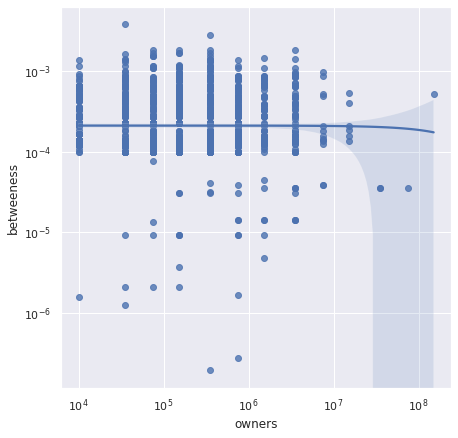

In [17]:
#sns.regplot(x=df['owners'], y=df['betweeness'])

f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log", yscale="log")
sns.regplot(x = df['owners'], y = df['betweeness'], ax=ax)

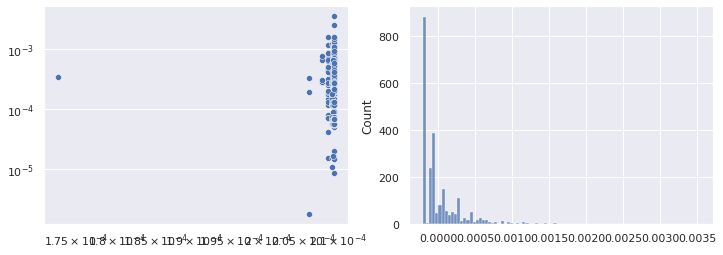

In [18]:
from matplotlib import rcParams

def linear_resplot(result):
    width, height = rcParams['figure.figsize']
    fig, axs = plt.subplots(1, 2, figsize=(2 * width, height))
    ax = sns.scatterplot(x=result.fittedvalues, y=result.resid, ax=axs[0])
    ax.set(xscale="log", yscale="log")
    ax.axhline(0)
    sns.histplot(result.resid, ax=axs[1])
    plt.show()

linear_resplot(result)

## Visualização da Rede

In [36]:
# save_gt(g, 'steam.net.gz')

# g = load_gt('steam.net.gz')
# m = draw_gt.sfdp_layout(g)
# move_gt(g, m)
# save_gt(g, 'steam.net.gz')

# r = netpixi.render('steam.net.gz');

In [35]:
# r.graph(color=0x000000)

# r.vertex_default(color=0xffffff, size=5)

# r.edge_default(color=0xffffff, width=1, curve1=0, curve2=0)

# #r.vertex_set_key('name')
# r

## Recortes

### Recorte #1

In [21]:
recorteHL2 = df[df['release_year'] > 2004]
print(len(recorteHL2))

modelHL2 = smf.ols(data=recorteHL2, formula='betweeness ~ owners')
resultHL2 = modelHL2.fit()
resultHL2.summary()

2319


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             betweeness   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.09680
Date:                Mon, 29 Nov 2021   Prob (F-statistic):              0.756
Time:                        19:01:31   Log-Likelihood:                 15605.
No. Observations:                2319   AIC:                        -3.121e+04
Df Residuals:                    2317   BIC:                        -3.119e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0002   6.12e-06     34.288      0.000       0.000       0.000
owners      4.825e-13   1.55e-12      0.311      0.756   -2.56e-12    3.52e-12
==============================================================================
Omnibus:                     1556.457   Durbin-Watson:                   1.694
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29248.516
Skew:                           2.905   Prob(JB):                         0.00
Kurtosis:                      19.399   Cond. No.                     4.02e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.02e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Recorte #2

In [22]:
recorteWaW = df[df['release_year'] > 2008]
print(len(recorteWaW))

modelarWaW = smf.ols(data=recorteWaW, formula='betweeness ~ owners')
resultarWaW = modelarWaW.fit()
resultarWaW.summary()

2027


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             betweeness   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.2688
Date:                Mon, 29 Nov 2021   Prob (F-statistic):              0.604
Time:                        19:01:31   Log-Likelihood:                 13575.
No. Observations:                2027   AIC:                        -2.715e+04
Df Residuals:                    2025   BIC:                        -2.713e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0002   6.75e-06     33.908      0.000       0.000       0.000
owners      8.569e-13   1.65e-12      0.518      0.604   -2.38e-12     4.1e-12
==============================================================================
Omnibus:                     1335.312   Durbin-Watson:                   1.765
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23598.973
Skew:                           2.840   Prob(JB):                         0.00
Kurtosis:                      18.721   Cond. No.                     4.15e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.15e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Recorte #3

In [23]:
recorteSMB = df[df['release_year'] > 2010]
#print(len(recorteWaW))

modelSMB = smf.ols(data=recorteSMB, formula='betweeness ~ owners')
resultSMB = modelSMB.fit()
resultSMB.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             betweeness   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.03678
Date:                Mon, 29 Nov 2021   Prob (F-statistic):              0.848
Time:                        19:01:31   Log-Likelihood:                 9904.6
No. Observations:                1484   AIC:                        -1.981e+04
Df Residuals:                    1482   BIC:                        -1.979e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0003   8.06e-06     33.654      0.000       0.000       0.000
owners      3.279e-13   1.71e-12      0.192      0.848   -3.03e-12    3.68e-12
==============================================================================
Omnibus:                      683.190   Durbin-Watson:                   1.865
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3873.004
Skew:                           2.112   Prob(JB):                         0.00
Kurtosis:                       9.693   Cond. No.                     4.79e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.79e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
df['categories'] = [','.join(map(str, l)) for l in df['categories']]
df

,name,owners,categories,release_year,betweeness
0,name,15000000.0,"Multi-player,Online Multi-Player,Local Multi-P...",2000,0.000000
1,Counter-Strike,7500000.0,"Multi-player,Online Multi-Player,Local Multi-P...",1999,0.000000
2,Team Fortress Classic,7500000.0,"Multi-player,Valve Anti-Cheat enabled",2003,0.000000
3,Day of Defeat,7500000.0,"Multi-player,Online Multi-Player,Local Multi-P...",2001,0.000000
4,Deathmatch Classic,7500000.0,"Single-player,Multi-player,Valve Anti-Cheat en...",1999,0.000000
...,...,...,...,...,...
2333,枕边少女 MOE Hypnotist - share dreams with you,75000.0,"Single-player,Steam Achievements,Full controll...",2014,0.000142
2334,Magical Monster Land,35000.0,"Single-player,Multi-player,Co-op,Shared/Split ...",2015,0.000114
2335,War Platform,35000.0,"Single-player,Steam Achievements,Includes leve...",2014,0.000121
2336,Clash of Chefs VR,350000.0,"Single-player,Steam Achievements,Steam Trading...",2014,0.000278


### Recorte #4

In [25]:
recorteMP = df.loc[df['categories'].str.contains('Multi-player')]
print(len(recorteMP))

modelMP = smf.ols(data=recorteMP, formula='betweeness ~ owners')
resultMP = modelMP.fit()
resultMP.summary()

793


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             betweeness   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.07243
Date:                Mon, 29 Nov 2021   Prob (F-statistic):              0.788
Time:                        19:01:31   Log-Likelihood:                 5287.1
No. Observations:                 793   AIC:                        -1.057e+04
Df Residuals:                     791   BIC:                        -1.056e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0002   1.12e-05     19.115      0.000       0.000       0.000
owners       4.54e-13   1.69e-12      0.269      0.788   -2.86e-12    3.77e-12
==============================================================================
Omnibus:                      444.541   Durbin-Watson:                   1.540
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3716.131
Skew:                           2.438   Prob(JB):                         0.00
Kurtosis:                      12.418   Cond. No.                     6.79e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.79e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Relacionando Recortes

In [26]:
recorte41 = recorteMP[recorteMP['release_year'] > 2004]
print(len(recorte41))

model41 = smf.ols(data=recorte41, formula='betweeness ~ owners')
result41 = model41.fit()
result41.summary()

781


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             betweeness   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.3951
Date:                Mon, 29 Nov 2021   Prob (F-statistic):              0.530
Time:                        19:01:31   Log-Likelihood:                 5204.3
No. Observations:                 781   AIC:                        -1.040e+04
Df Residuals:                     779   BIC:                        -1.040e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0002   1.13e-05     19.135      0.000       0.000       0.000
owners       1.08e-12   1.72e-12      0.629      0.530   -2.29e-12    4.45e-12
==============================================================================
Omnibus:                      436.164   Durbin-Watson:                   1.555
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3609.794
Skew:                           2.427   Prob(JB):                         0.00
Kurtosis:                      12.347   Cond. No.                     6.70e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.7e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
recorte42 = recorteMP[recorteMP['release_year'] > 2008]
print(len(recorte42))

model42 = smf.ols(data=recorte42, formula='betweeness ~ owners')
result42 = model42.fit()
result42.summary()

663


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             betweeness   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.3387
Date:                Mon, 29 Nov 2021   Prob (F-statistic):              0.561
Time:                        19:01:31   Log-Likelihood:                 4391.8
No. Observations:                 663   AIC:                            -8780.
Df Residuals:                     661   BIC:                            -8771.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0002   1.27e-05     18.829      0.000       0.000       0.000
owners      1.066e-12   1.83e-12      0.582      0.561   -2.53e-12    4.66e-12
==============================================================================
Omnibus:                      358.039   Durbin-Watson:                   1.617
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2665.965
Skew:                           2.337   Prob(JB):                         0.00
Kurtosis:                      11.640   Cond. No.                     7.08e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.08e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
recorte43 = recorteMP[recorteMP['release_year'] > 2010]
print(len(recorte43))

model43 = smf.ols(data=recorte43, formula='betweeness ~ owners')
result43 = model43.fit()
result43.summary()

490


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             betweeness   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.1208
Date:                Mon, 29 Nov 2021   Prob (F-statistic):              0.728
Time:                        19:01:31   Log-Likelihood:                 3216.4
No. Observations:                 490   AIC:                            -6429.
Df Residuals:                     488   BIC:                            -6420.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0003   1.57e-05     18.174      0.000       0.000       0.000
owners      6.826e-13   1.96e-12      0.348      0.728   -3.18e-12    4.54e-12
==============================================================================
Omnibus:                      253.463   Durbin-Watson:                   1.776
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1648.204
Skew:                           2.204   Prob(JB):                         0.00
Kurtosis:                      10.829   Cond. No.                     8.16e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.16e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Checagem de estatísticas

In [1]:
soma_owners = df['owners'].sum()
print(soma_owners/len(df))

NameError: name 'df' is not defined

5475600
0.6301694791438381


<AxesSubplot:ylabel='Density'>

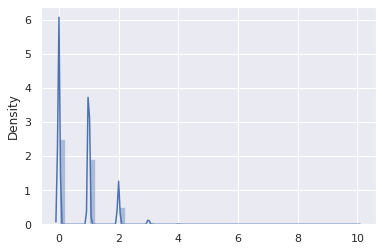

In [30]:
total = 0
print(len(numeros_generos))

for num in numeros_generos:
     total += num
print(total / len(numeros_generos))

# print(n_arest)
# print(n_vert)
# print(n_arest/n_vert)

sns.distplot(numeros_generos)

EOF